# Automating administrative workflows

In [1]:
from arcgis.gis import *

In [2]:
gis = GIS("https://neenterprise.esri.com/portal/home/", "phammons")

Enter password: ········


## Querying for users

In [3]:
gis.users.search()

[<User username:abrown>,
 <User username:abrown.testing>,
 <User username:achapkowski>,
 <User username:admin>,
 <User username:afalker>,
 <User username:anieto>,
 <User username:aziegler>,
 <User username:batman>,
 <User username:bdavidson>,
 <User username:cnylen>,
 <User username:contractor>,
 <User username:dlashell>,
 <User username:dwickens>,
 <User username:esri_boundaries>,
 <User username:esri_demographics>,
 <User username:esri_livingatlas>,
 <User username:esri_nav>,
 <User username:geri_miller>,
 <User username:ghudgins>,
 <User username:jbarryne>,
 <User username:jcusick>,
 <User username:jkezon_guest>,
 <User username:jsealy>,
 <User username:jskinner>,
 <User username:kruggiero>,
 <User username:kswavely>,
 <User username:ldafner>,
 <User username:mmartini>,
 <User username:mscott>,
 <User username:mviverito>,
 <User username:pgahagan>,
 <User username:phammons>,
 <User username:pkundu>,
 <User username:publisher>,
 <User username:rweeden>,
 <User username:sscher>,
 <Use

In [4]:
#filter users
gis.users.search("ph*")

[<User username:phammons>]

In [5]:
#filter users
gis.users.search("jdoe")

[]

### Create a new user

In [6]:
jdoe = gis.users.create(username = 'jdoe', password='whateva4eva', 
                 firstname='John', lastname='Doe',
                 email='jdoe@esri.com', role='org_user')

jdoe

<User username:jdoe>

In [7]:
type(jdoe)

arcgis.gis.User

In [8]:
jdoe.update(thumbnail='jdoe.jpg')

True

<User username:jdoe>
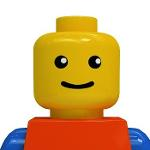

In [9]:
jdoe

## Searching for groups

In [13]:
gis.groups.search()

[<Group title:"AGOL - Fieldwork" owner:aziegler>,
 <Group title:"Allentown_311_Testing" owner:abrown>,
 <Group title:"Big Data File Share" owner:admin>,
 <Group title:"Chittenden Co VT" owner:rweeden>,
 <Group title:"Crime analysis1" owner:phammons>,
 <Group title:"CTA" owner:ldafner>,
 <Group title:"Esri Boundary Layers" owner:esri_boundaries>,
 <Group title:"Esri Demographic Layers" owner:esri_demographics>,
 <Group title:"Facilities" owner:aziegler>,
 <Group title:"Featured Maps and Apps" owner:admin>,
 <Group title:"Living Atlas" owner:esri_livingatlas>,
 <Group title:"Living Atlas Analysis Layers" owner:esri_livingatlas>,
 <Group title:"Navigator Maps" owner:esri_nav>,
 <Group title:"NYCHA" owner:abrown>]

In [11]:
#create groups
group_summary = 'A group to share data related to crime and analyze them'
group_description = 'Analysis, visualization, modeling of crime and crime related datasets using GIS'

crime_group = gis.groups.create(title='Crime analysis1', tags='crime, machine learning, clustering', 
                      description=group_description,
                      snippet=group_summary,
                     thumbnail='crime_analysis_group.png')

<Group title:"Crime analysis1" owner:phammons>
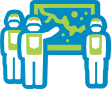

In [12]:
crime_group

## Add user to a group

In [14]:
crime_group.add_users(['jdoe'])

{'notAdded': []}

## Removing users

In [23]:
batman = gis.users.search('batman')[0]
batman

IndexError: list index out of range

In [22]:
batman.delete()

True

In [20]:
batman.items()

[]

In [18]:
batman.groups

[]

In [19]:
items = batman.items()
for item in items:
    item.reassign_to('jdoe')

Item does not exist or is inaccessible.


RuntimeError: Item does not exist or is inaccessible.
(Error Code: 400)

## John Doe's contents

In [21]:
jdoe.items()

[<Item title:"gotham_crime" type:CSV owner:jdoe>,
 <Item title:"gotham_crime" type:Feature Layer Collection owner:jdoe>]